In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
file_2d = 'data_2d.csv'
file_mnist = 'mnist.csv'
# Завантаження датасетів
data_2d = pd.read_csv(file_2d)
data_mnist = pd.read_csv(file_mnist)

# Попередній огляд датасетів
print("Перших кілька рядків 2D датасету:")
print(data_2d.head())

print("\nФорма MNIST датасету:")
print(data_mnist.shape)


Перших кілька рядків 2D датасету:
   0.000000000000000000e+00  -7.687164597386728637e-01  \
0                       0.0                   2.687848   
1                       0.0                  -0.201379   
2                       0.0                   0.608496   
3                       0.0                  -0.082282   
4                       0.0                   2.083069   

   4.608603078297135447e-01  
0                  2.366961  
1                  0.470430  
2                  1.225400  
3                  1.137218  
4                  2.694482  

Форма MNIST датасету:
(499, 785)



Обробка 2D датасету...


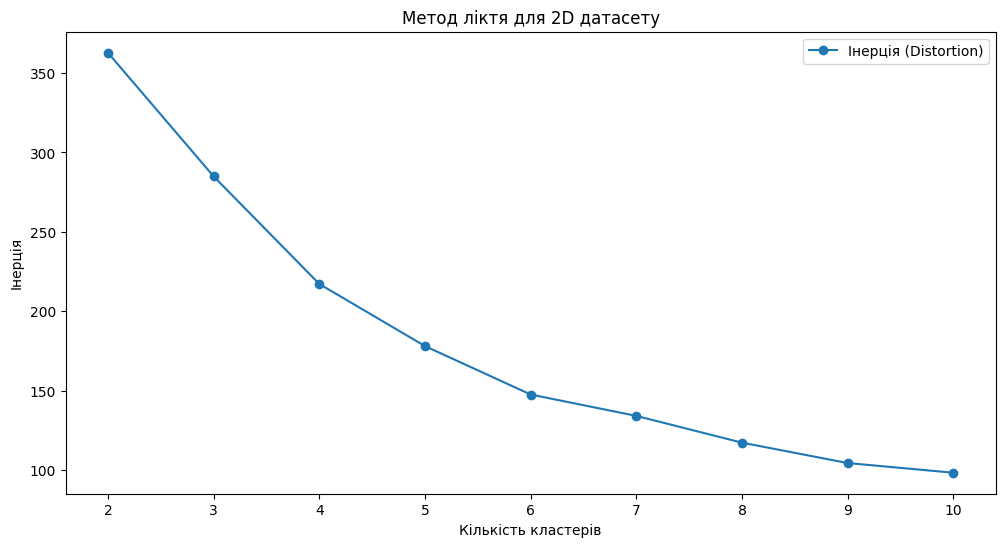


Обробка MNIST датасету...


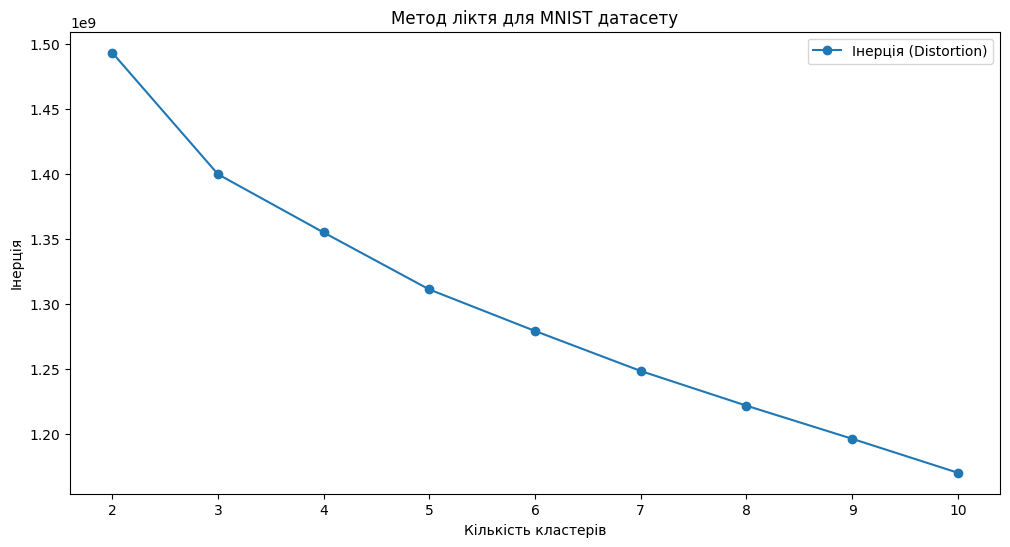

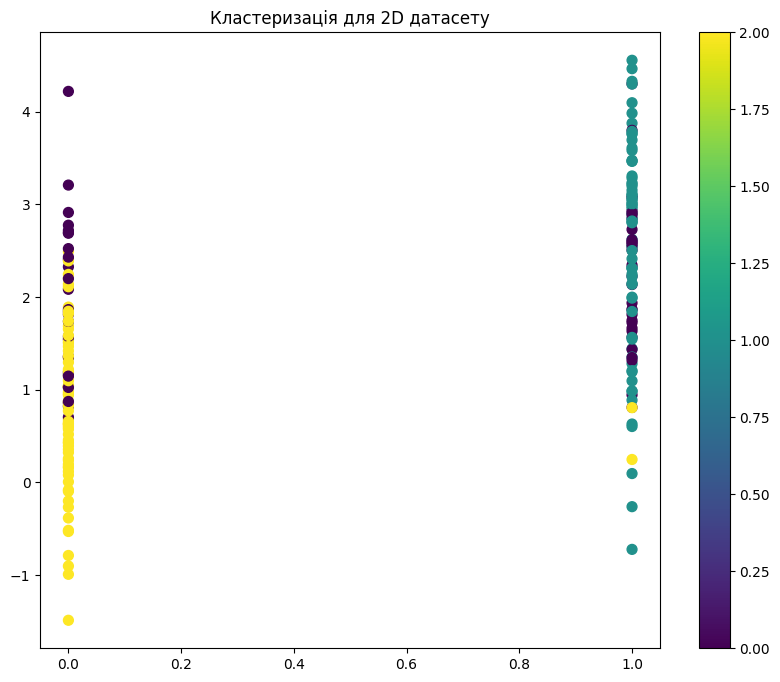

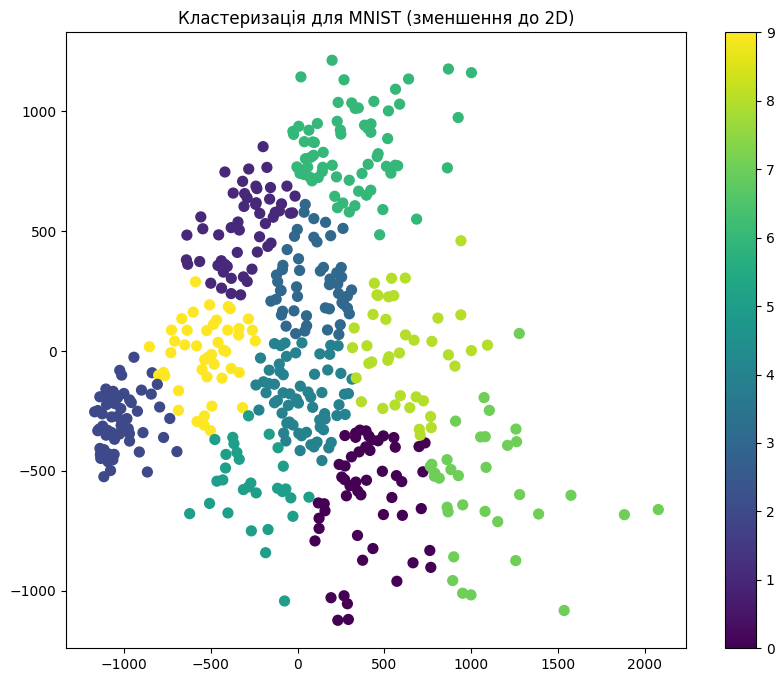

In [2]:
# Завдання 1: Алгоритм K-means та метод ліктя

def elbow_method(data, max_clusters=10):
    distortions = []
    silhouette_scores = []
    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(data, kmeans.labels_))

    return distortions, silhouette_scores

# 2D Датасет
print("\nОбробка 2D датасету...")
distortions_2d, silhouette_2d = elbow_method(data_2d, max_clusters=10)

plt.figure(figsize=(12, 6))
plt.plot(range(2, 11), distortions_2d, marker='o', label='Інерція (Distortion)')
plt.xlabel('Кількість кластерів')
plt.ylabel('Інерція')
plt.title('Метод ліктя для 2D датасету')
plt.legend()
plt.show()

# MNIST Датасет
print("\nОбробка MNIST датасету...")
mnist_features = data_mnist.iloc[:, 1:].values  # Перший стовпець вважається мітками (за потреби)
distortions_mnist, silhouette_mnist = elbow_method(mnist_features, max_clusters=10)

plt.figure(figsize=(12, 6))
plt.plot(range(2, 11), distortions_mnist, marker='o', label='Інерція (Distortion)')
plt.xlabel('Кількість кластерів')
plt.ylabel('Інерція')
plt.title('Метод ліктя для MNIST датасету')
plt.legend()
plt.show()

# Завдання 2: Візуалізація результатів

def visualize_clusters(data, labels, title):
    plt.figure(figsize=(10, 8))
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=50)
    plt.colorbar()
    plt.title(title)
    plt.show()

# Візуалізація для 2D датасету
optimal_k_2d = 3  # Оновіть відповідно до методу ліктя
kmeans_2d = KMeans(n_clusters=optimal_k_2d, random_state=42)
kmeans_2d.fit(data_2d)

visualize_clusters(data_2d.values, kmeans_2d.labels_, 'Кластеризація для 2D датасету')

# PCA для MNIST
pca = PCA(n_components=2)
mnist_pca = pca.fit_transform(mnist_features)

optimal_k_mnist = 10  # Оновіть відповідно до методу ліктя
kmeans_mnist = KMeans(n_clusters=optimal_k_mnist, random_state=42)
kmeans_mnist.fit(mnist_pca)

visualize_clusters(mnist_pca, kmeans_mnist.labels_, 'Кластеризація для MNIST (зменшення до 2D)')

# Результати кластеризації завершено!


In [ ]:
Для 2D датасету оптимальна кількість кластерів - 3, оскільки кут на графіку інерції найбільший на цій точці.
Візуалізація кластерів демонструє чітке розділення.
Для MNIST датасету оптимальна кількість кластерів - 10.
Зменшення розмірності за допомогою PCA дозволило чітко візуалізувати кластери, які відповідають окремим цифрам.